In [1]:
#import necessary libraries

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


# Evaluation and comparision of all the models


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,auc,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve

In [7]:
#import dataset

In [9]:
df=pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Information about the dataset

Attribute Information:

*.ID number

*.Diagnosis (M = malignant, B = benign)


*Malignant = 1 (indicates prescence of cancer cells)
*Benign = 0 (indicates abscence)

# EDA

In [11]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [15]:
df.shape

(569, 32)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [22]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Checking missing values

In [23]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Correlation

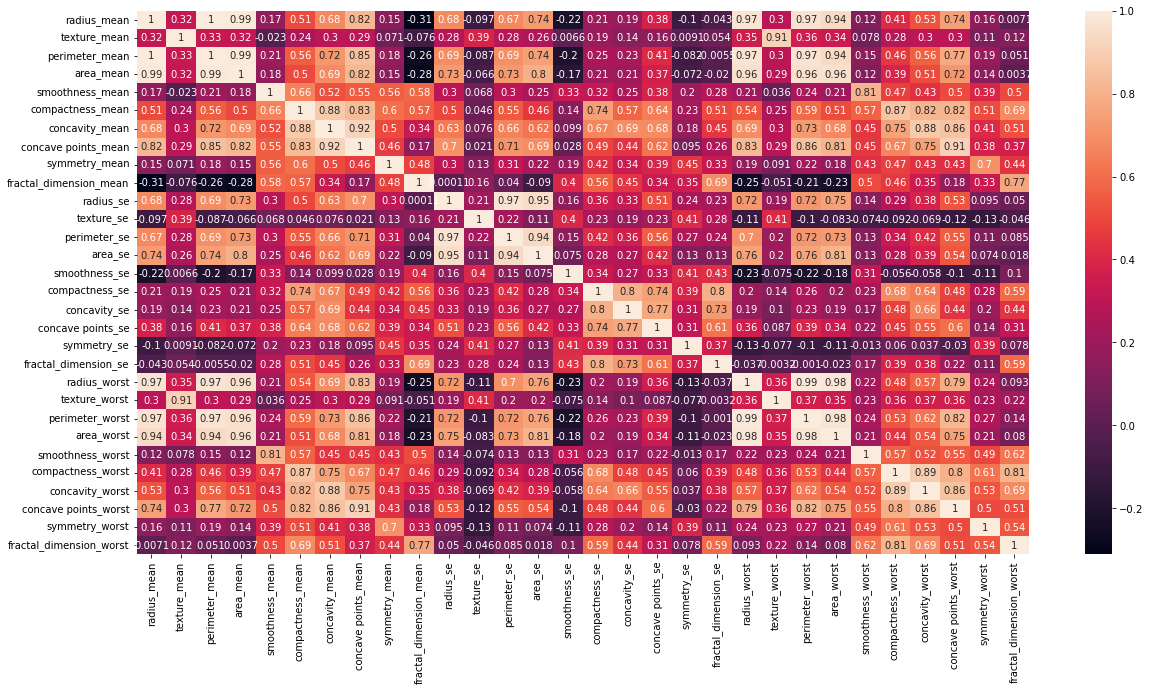

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.ioff()

# Highly correlated pairs

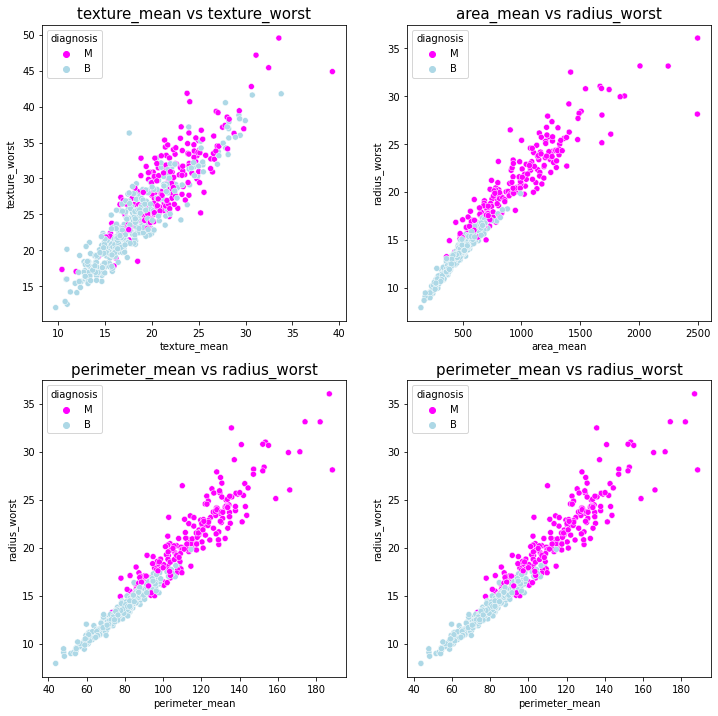

In [27]:
palette ={'B' : 'lightblue', 'M' : 'magenta'}


fig = plt.figure(figsize=(12,12))
def plot_scatter(a,b,k):
    plt.subplot(k)
    sns.scatterplot(x = df[a], y = df[b], hue = "diagnosis",
                    data = df, palette = palette)
    plt.title(a + ' vs ' + b,fontsize=15)
    
plot_scatter('texture_mean','texture_worst',221) 
plot_scatter('area_mean','radius_worst',222) 
plot_scatter('perimeter_mean','radius_worst',223)  
plot_scatter('perimeter_mean','radius_worst',224) 

# Inverse correlated pairs

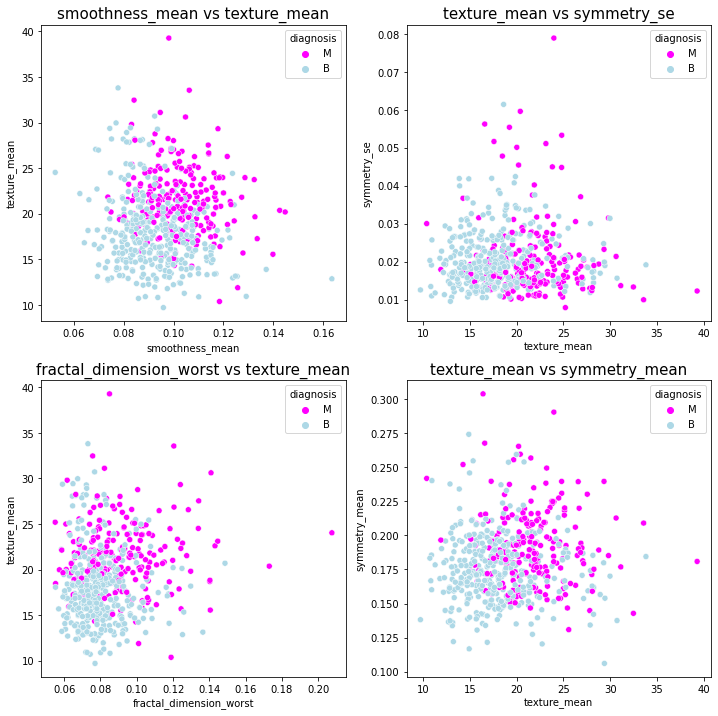

In [28]:
fig = plt.figure(figsize=(12,12))

  
plot_scatter('smoothness_mean','texture_mean',221) 
plot_scatter('texture_mean','symmetry_se',222) 
plot_scatter('fractal_dimension_worst','texture_mean',223) 
plot_scatter('texture_mean','symmetry_mean',224)

# Low correlated pairs

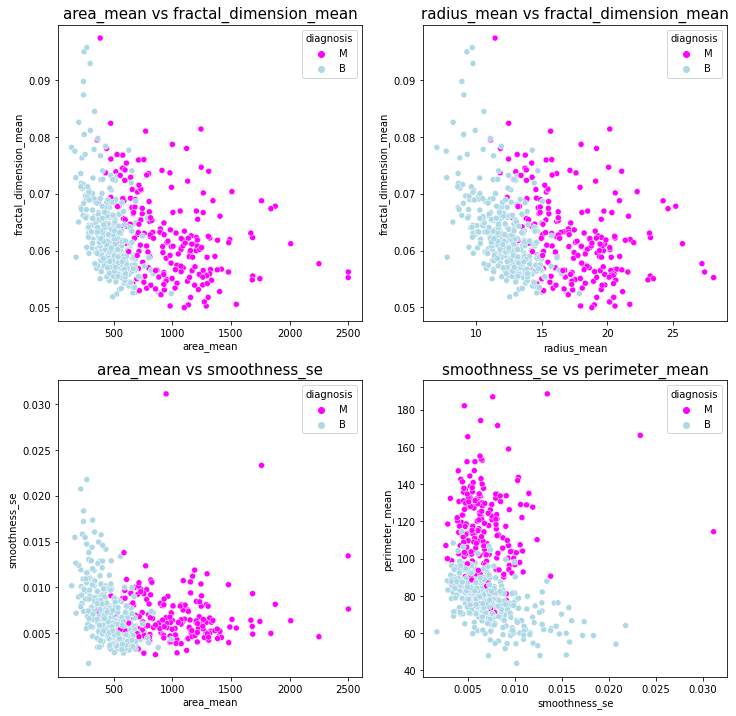

In [29]:
fig = plt.figure(figsize=(12,12))

plot_scatter('area_mean','fractal_dimension_mean',221)
plot_scatter('radius_mean','fractal_dimension_mean',222)
plot_scatter('area_mean','smoothness_se',223)
plot_scatter('smoothness_se','perimeter_mean',224)

# Data Visualization

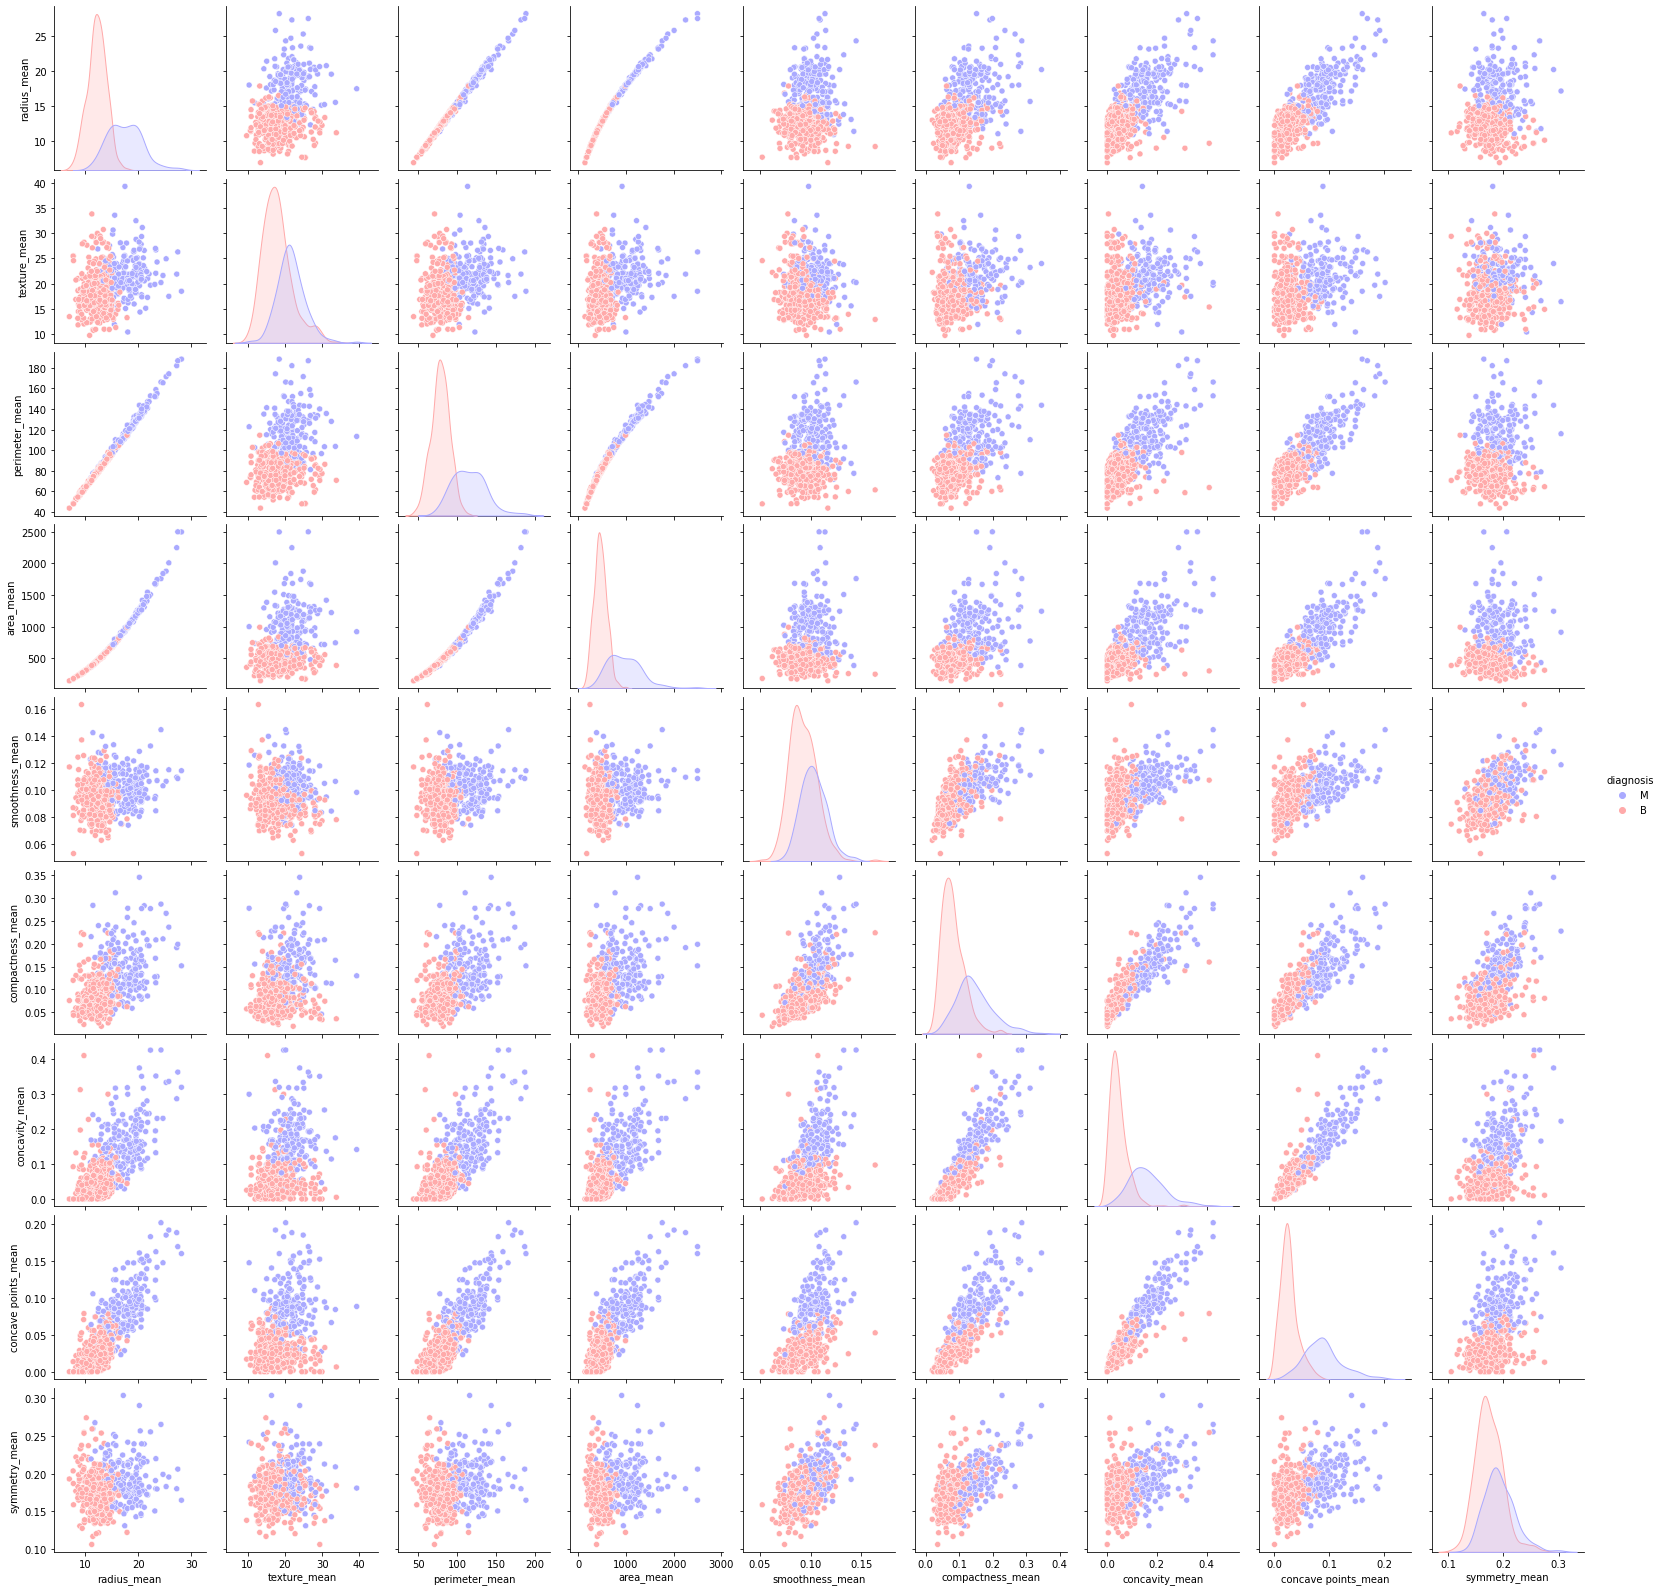

In [30]:
from pylab import rcParams

rcParams['figure.figsize'] = 8,5

cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean','diagnosis']

sns_plot = sns.pairplot(data=df[cols],hue='diagnosis', palette='bwr')

<AxesSubplot:xlabel='area_mean', ylabel='smoothness_mean'>

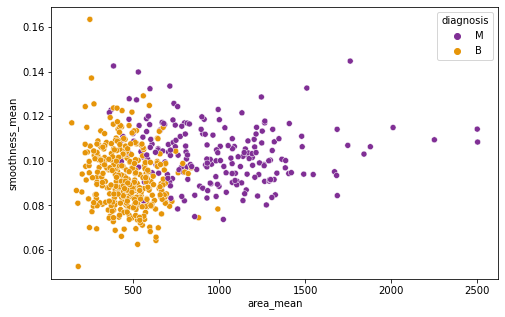

In [31]:
sns.scatterplot(x= 'area_mean', y= 'smoothness_mean', hue= 'diagnosis', data=df, palette='CMRmap')

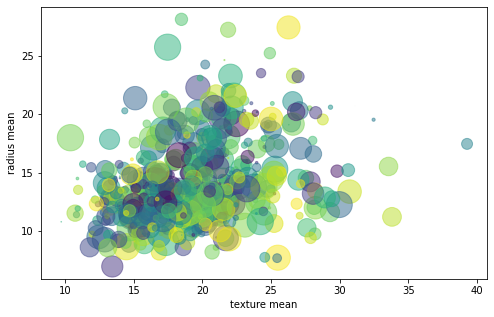

In [32]:
size = len(df['texture_mean'])

area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )

plt.xlabel("texture mean")
plt.ylabel("radius mean") 
plt.scatter(df['texture_mean'], df['radius_mean'], s=area, c= colors, alpha=0.5)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

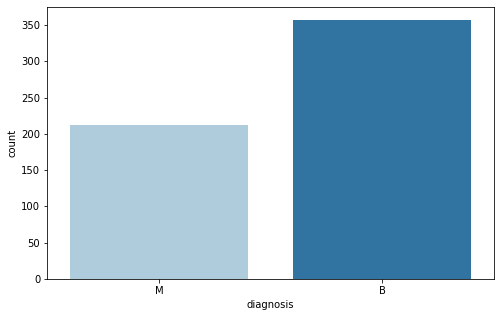

In [33]:
sns.countplot(df['diagnosis'],palette='Paired')

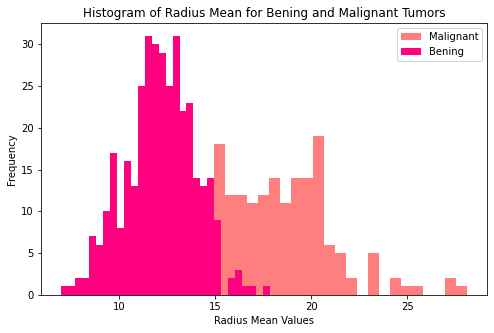

In [34]:
m = plt.hist(df[df["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(df[df["diagnosis"] == "B"].radius_mean,bins=30, fc = (1,0,0.5), label= "Bening")

plt.legend()
plt.xlabel ("Radius Mean Values")
plt.ylabel ("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()

# Encoding categorical data

In [35]:
LEncoder = LabelEncoder()

df['diagnosis'] = LEncoder.fit_transform(df['diagnosis'])

# Feature/Label

In [36]:
X = df.drop('diagnosis',axis=1)
y = df[['diagnosis']]

# Train/Test

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Scalling the Features

In [41]:
scaler=StandardScaler()

In [42]:
scaler.fit(X_train)

StandardScaler()

In [43]:
scaled_X_train=scaler.transform(X_train)
scaled_X_test=scaler.transform(X_test)

# Train the Model

In [45]:
# Logistic Regression


logreg= LogisticRegression()

logreg.fit(scaled_X_train, y_train)

y_pred_logreg = logreg.predict(scaled_X_test)


# Gradient Boosting Classifier


GB = GradientBoostingClassifier()

GB.fit(scaled_X_train, y_train)

y_pred_GB = GB.predict(scaled_X_test)



# Random Forest Classifier

rf = RandomForestClassifier()

rf.fit(scaled_X_train, y_train)

y_pred_rf = rf.predict(scaled_X_test)


# Decision Tree Classifier

dt = DecisionTreeClassifier()

dt.fit(scaled_X_train, y_train)

y_pred_dt = dt.predict(scaled_X_test)


# KNN


knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(scaled_X_train, y_train)

y_pred_knn = knn.predict(scaled_X_test)


# XGB Classifier

XGB = XGBClassifier() 

XGB.fit(scaled_X_train, y_train)

y_pred_XGB = XGB.predict(scaled_X_test)



# SVM

svc = SVC(probability=True)

svc.fit(scaled_X_train,y_train)

y_pred_svc = svc.predict(scaled_X_test)

[21:32:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [50]:
scaled_X_train.shape


(455, 30)

In [51]:
y_train.shape

(455, 1)

In [52]:
scaled_X_test.shape

(114, 30)

In [53]:
y_test.shape

(114, 1)

# Comparison All Model Performance

In [54]:
models = []

Z = [SVC() , DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier() ,XGBClassifier(),
    RandomForestClassifier() , GradientBoostingClassifier()]


X = ["SVC" , "DecisionTreeClassifier" , "LogisticRegression" , "KNeighborsClassifier" ,
    "RandomForestClassifier" , "GradientBoostingClassifier", "XGB"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( scaled_X_train , y_train )
    pred = model.predict(scaled_X_test)
    models.append(accuracy_score(pred , y_test))   

[21:38:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [55]:
d = { "Accuracy" : models , "Algorithm" : X }
data_frame = pd.DataFrame(d)
data_frame

,Accuracy,Algorithm
0,0.982456,SVC
1,0.947368,DecisionTreeClassifier
2,0.973684,LogisticRegression
3,0.947368,KNeighborsClassifier
4,0.956140,RandomForestClassifier
5,0.964912,GradientBoostingClassifier
6,0.956140,XGB


Text(0.5, 1.0, 'Accuracy of all Algorithms')

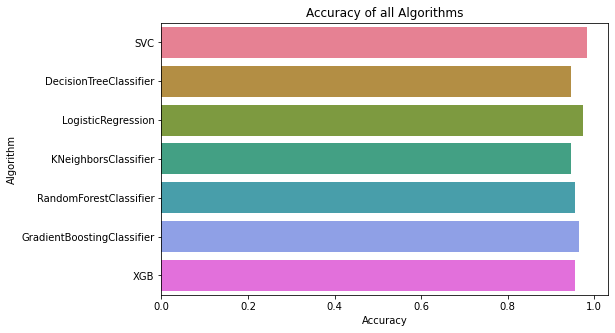

In [56]:
sns.barplot(data_frame['Accuracy'],data_frame['Algorithm'],palette= "husl").set_title('Accuracy of all Algorithms')

# Evaluationg Model Performance

In [57]:
cm = np.array(confusion_matrix(y_test, y_pred_svc, labels=[1,0]))

confusion_mat= pd.DataFrame(cm, index = ['cancer', 'healthy'],
                           columns =['predicted_cancer','predicted_healthy'])

confusion_mat

,predicted_cancer,predicted_healthy
cancer,41,2
healthy,0,71


<AxesSubplot:>

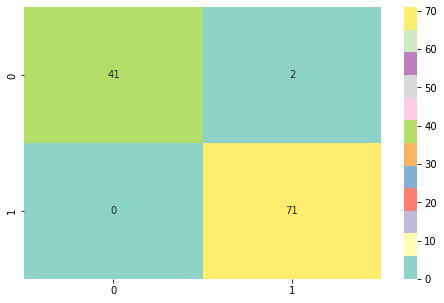

In [58]:
sns.heatmap(cm,annot=True,fmt='g',cmap='Set3')

In [59]:
print(accuracy_score(y_test, y_pred_svc))

0.9824561403508771


In [60]:
print(precision_score(y_test, y_pred_svc))

1.0


In [61]:
print(recall_score(y_test, y_pred_svc))

0.9534883720930233


In [62]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

